<a href="https://colab.research.google.com/github/AlexKressner/Business_Intelligence/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Übersicht
1. [Erste Visualisierungsformen](#erste_visualisierungen)
  1. [Histogramm](#einführung_hist)
  1. [Säulendiagramm](#einführung_bar)
  1. [Liniendiagramm](#einführung_line)
1. [Weitere nützliche Funktionen](#weitere_funktionen)

# Übungsaufgaben
- [Visualisierung - Verkaufszahlen Walmart](#walmart)

# Setup
Für die Visualisierung nutzen wir das Package `matplotlib` und die Funktionalitäten rundum `pyplot`. Dazu importieren wir zunächst das Package (ggf. müssen Sie dieses noch mithilfe von `pip3 install matplotlib` installieren). Es ist üblich `matplotlib.pyplot` als `plt` zu importieren.

In [1]:
import matplotlib.pyplot as plt

Zusätzlich müssen wir erneut das Package `pandas` laden.

In [2]:
import pandas as pd

## 1 Erste Visualisierungsformen <a class="anchor" id="erste_visualisierungen"></a>
Wir laden erneut den Rossmann Store Sales Datensatz aus einer csv-Datei. Anschließend wenden wir die `.plot()` Methode auf diesen DataFrame an. Über das Argument `kind` kann z.B. gesteuert werden, welche Art von Diagramm erzeugt wird.

In [3]:
#! git clone https://github.com/AlexKressner/Business_Intelligence

In [4]:
PATH = "Daten/Rossmann/"

In [5]:
dtypes= {
    "Store":"str",
    "DayOfWeek":"str",
    "Open":"str",
    "Promo":"str",
    "StateHoliday":"str",
    "SchoolHoliday":"str",
}

In [6]:
sales = pd.read_csv(f"{PATH}sales_short.csv", dtype=dtypes, parse_dates=["Date"], sep=";")

In [7]:
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### 1.1 Histogramm <a class="anchor" id="einführung_hist"></a>
Ein Histogramm ist eine grafische Darstellung der Häufigkeitsverteilung kardinal skalierter Merkmale. Es erfordert die Einteilung der Daten in Klassen (englisch bins), die eine konstante oder variable Breite haben können. Es werden direkt nebeneinanderliegende Rechtecke von der Breite der jeweiligen Klasse gezeichnet, deren Flächeninhalte die (relativen oder absoluten) Klassenhäufigkeiten darstellen. Die Höhe jedes Rechtecks stellt dann die (relative oder absolute) Häufigkeitsdichte dar, also die (relative oder absolute) Häufigkeit dividiert durch die Breite der entsprechenden Klasse. (Quelle: Wikipedia)

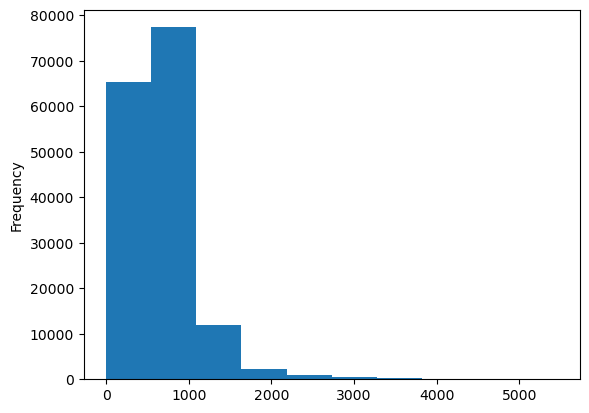

In [8]:
# Blue Print zur Erstellung von Abbildungen
# 1. Welche Daten sollen abgebildet werden -> Auswahl der Spalte mit Daten: sales["Customers"]
# 2. Wie ist die Darstellungsform -> Auswahl der Abbilung: plot(kind="hist")
sales["Customers"].plot(kind="hist")
plt.show()

Mit dem Argument `bins` geben Sie an, in wie viele verschiedene Klassen die Daten eingeteilt werden. **Frage:** Was ist der Default-Wert für `bins`, d.h. wenn kein Argument beim Aufruf der Methode `.plot()` übergeben wird?

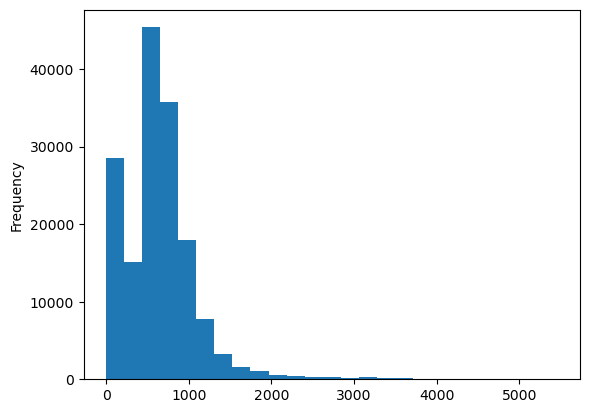

In [9]:
sales["Customers"].plot(kind="hist", bins=25)
plt.show()

Ein Übersicht zu allen Argumenten zur Übergabe an die Funktion `plot()` finden Sie in der Online-Dokumentation von `pandas` unter folgendem [Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

Das folgende Beispiel zeigt, wie Sie mehrere Histogramm für einzelne Spalten gleichzeitig erstellen. Zunächst wählen Sie die relevanten Spalten des DataFrames `sales` aus, d.h. `[["Customers", "Sales"]]` und rufen im Anschluss direkt die Funktion zur Erstellung eines Histogramms auf `hist()`. Zu letzterer finden Sie die Dokumentation [hier](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html).

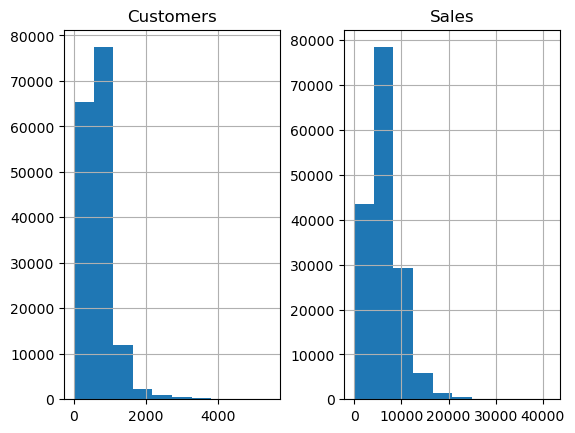

In [10]:
sales[["Customers", "Sales"]].hist(bins=10)
plt.show()

### 1.2 Säulendiagramm <a class="anchor" id="einführung_bar"></a>
Das Säulendiagramm, bei schmalen Säulen auch Stabdiagramm genannt, ist ein Diagramm zur vergleichenden Darstellung, das durch auf der x-Achse senkrecht stehende, nicht aneinandergrenzende Säulen (Rechtecke mit bedeutungsloser Breite) die Häufigkeitsverteilung einer diskreten (Zufalls-)Variablen veranschaulicht. Das Säulendiagramm eignet sich besonders, um wenige Ausprägungen (bis ca. 15) zu veranschaulichen.(Quelle: Wikipedia)

In [11]:
mean_customers_day_of_week = sales.groupby("DayOfWeek")["Customers"].mean()
mean_customers_day_of_week.head()

DayOfWeek
1    768.791390
2    773.294529
3    747.991140
4    700.852018
5    691.513859
Name: Customers, dtype: float64

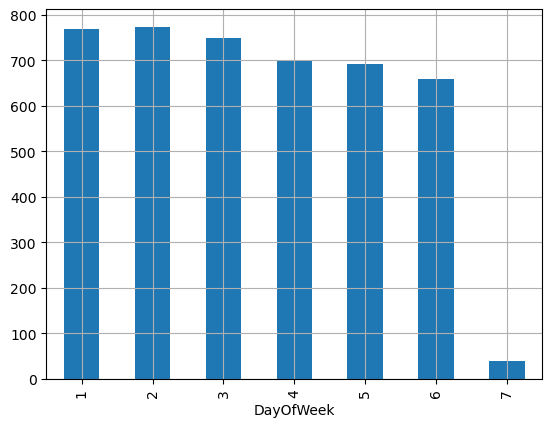

In [12]:
mean_customers_day_of_week.plot(kind="bar", grid=True)
plt.show()

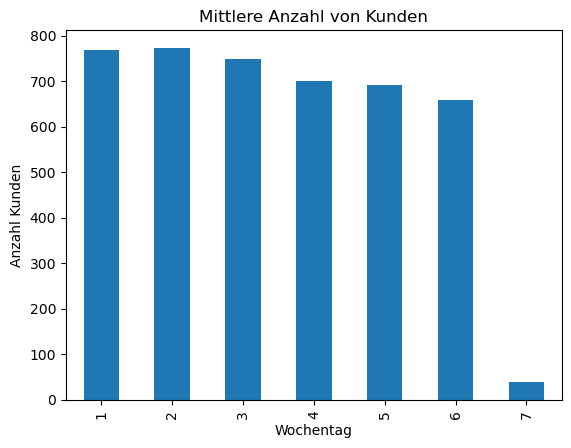

In [13]:
mean_customers_day_of_week.plot(kind="bar",
                             title="Mittlere Anzahl von Kunden",
                             xlabel="Wochentag",
                             ylabel="Anzahl Kunden",
                             grid=False
                            )
plt.show()

### 1.3 Liniendiagramm <a class="anchor" id="einführung_line"></a>
Ein Liniendiagramm, auch Kurvendiagramm, ist die graphische Darstellung des funktionellen Zusammenhangs zweier (bei zweidimensionaler Darstellung) oder dreier (bei dreidimensionaler Darstellung) Merkmale als Diagramm in Linienform, wodurch Veränderungen bzw. Entwicklungen (etwa innerhalb eines bestimmten Zeitabschnitts) dargestellt werden können. (Quelle: Wikipedia)

**Frage:** Bitte erläutern Sie was in den folgenden Code-Zellen passiert? Hinweis: Wir erzeugen zunächst eine neue Spalte, deren Werte wir aus der Spalte `Date` ableiten und gruppieren die Daten anschließend für die Visualisierung.

In [14]:
sales.Date.head()

0   2015-07-31
1   2015-07-31
2   2015-07-31
3   2015-07-31
4   2015-07-31
Name: Date, dtype: datetime64[ns]

In [15]:
sales["YearMonth"] = sales.Date.dt.strftime("%Y-%m")

In [16]:
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,YearMonth
0,1,5,2015-07-31,5263,555,1,1,0,1,2015-07
1,2,5,2015-07-31,6064,625,1,1,0,1,2015-07
2,3,5,2015-07-31,8314,821,1,1,0,1,2015-07
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015-07
4,5,5,2015-07-31,4822,559,1,1,0,1,2015-07


Wie Sie oben erkennen können, erhalten wir durch die Gruppierung eine `Series`. Der Index der Serie ist `YearMonth`, die Werte die Summe der Kunden. Wir können die `Series` wie folgt wieder in einen `DataFrame` umwandeln.

In [17]:
timeseries_sum_of_customers = sales.groupby("YearMonth")["Customers"].sum().reset_index()
timeseries_sum_of_customers.head()

,YearMonth,Customers
0,2015-01,3044796
1,2015-02,3855727
2,2015-03,15316174
3,2015-04,16897212
4,2015-05,14112444


Mit der Methode `.rename()` können Sie beispielsweise die Namen von Spalten eines Dataframes ändern. Die Systematik ist die folgende: `"alter Spaltenname":"neuer Spaltenname"`!

In [18]:
# Anzahl Kunden in Tausend
timeseries_sum_of_customers.Customers = timeseries_sum_of_customers.Customers/1000

In [19]:
timeseries_sum_of_customers.rename(columns={"YearMonth":"Jahr-Woche", "Customers":"AnzahlKunden(Tsd)"}, inplace=True)

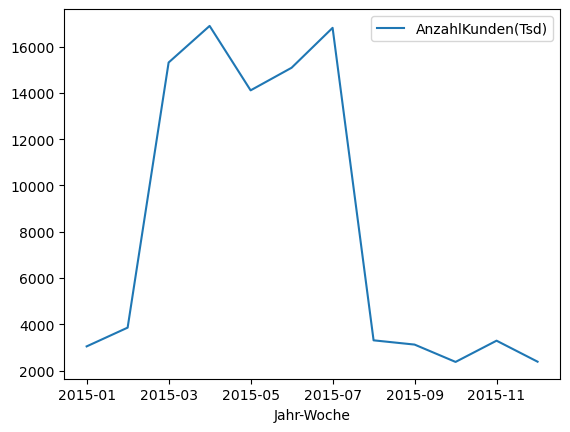

In [20]:
timeseries_sum_of_customers.plot(kind="line", x="Jahr-Woche", y="AnzahlKunden(Tsd)")
plt.show()

Liniendiagramm mit Rotation der x-Achse um 45 Grad (`rot=45`) und Anzeige sämtlicher Jahre, in denen Weltmeisterschaften gespielt wurden. Für letzteres nutzen Sie den Parameter `xticks`. Dieser erwartet eine Liste, die alle auf der x-Achse anzuzeigenden Elemente enthält. Mit dem Aufruf `data.Year.unique()` erhalten wir genau eine Liste, die alle Jahre an denen Weltmeisterschaften gespielt wurde.

In [21]:
timeseries_sum_of_customers["Jahr-Woche"].unique()

array(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
      dtype=object)

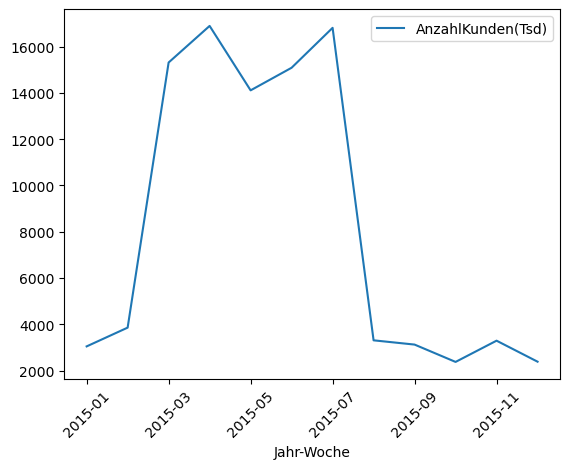

In [22]:
timeseries_sum_of_customers.plot(kind="line",
            x="Jahr-Woche",
            y="AnzahlKunden(Tsd)",
            rot=45,
            legend=True,
            )
plt.show()

## 2 Weitere nützliche Funktionalitäten <a class="anchor" id="weitere_funktionen"></a>



In [23]:
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,YearMonth
0,1,5,2015-07-31,5263,555,1,1,0,1,2015-07
1,2,5,2015-07-31,6064,625,1,1,0,1,2015-07
2,3,5,2015-07-31,8314,821,1,1,0,1,2015-07
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015-07
4,5,5,2015-07-31,4822,559,1,1,0,1,2015-07


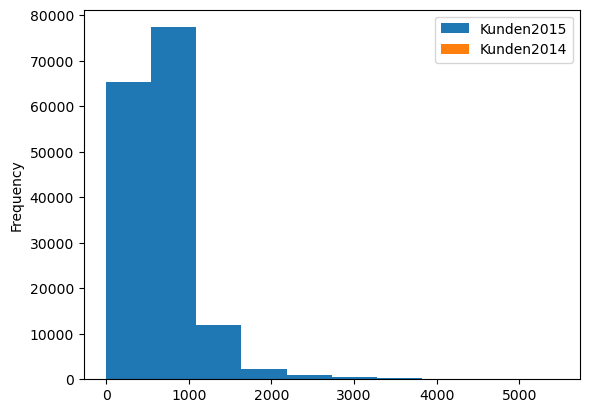

In [24]:
# Hinzufügen einer Legende
sales[sales.Date.dt.year==2015]["Customers"].plot(kind="hist")
sales[sales.Date.dt.year==2014]["Customers"].plot(kind="hist")
plt.legend(["Kunden2015","Kunden2014"])
plt.show()

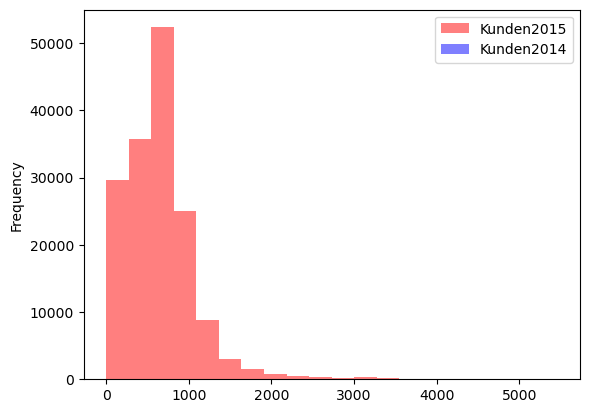

In [25]:
# Transparenz
# 1. Histogramm
sales[sales.Date.dt.year==2015]["Customers"].plot(kind="hist", alpha=0.5, bins=20, color="red")
# 2. Histogramm
sales[sales.Date.dt.year==2014]["Customers"].plot(kind="hist", alpha=0.5, bins=20, color="blue")
# Legende in der Abbildung für beide Histogramm
plt.legend(["Kunden2015","Kunden2014"])
# Befehld zur Erstellung der Abbildung
plt.show()

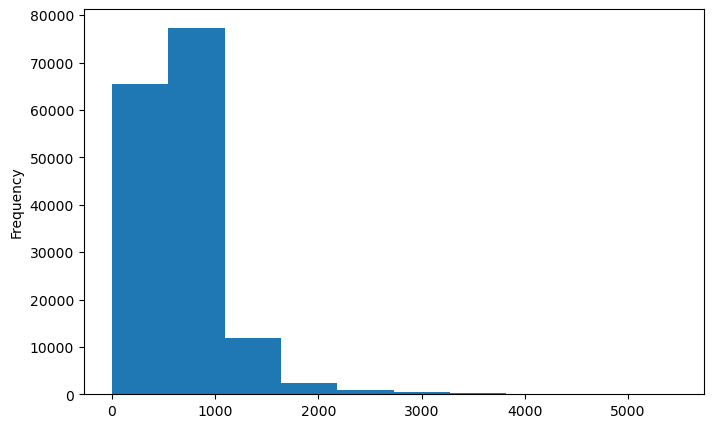

In [26]:
# Veränderung der Diagrammgröße
sales[sales.Date.dt.year == 2015]["Customers"].plot(kind="hist", figsize=(8, 5))
plt.show()

### Aufgabe: Visualisierungen - Rossmann Store Sales <a class="anchor" id="rossmann"></a>

Bitte berarbeiten Sie nun die folgenden Aufgaben:
1. Erstellen Sie ein Histogramm, welches die gesamten monatlichen Verkaufszahlen (`Sales`) zeigt!
1. Vergleichen Sie die täglichen Verkaufszahlen mit und ohne Promo in zwei Histogrammen. Passen Sie bitte die Größe des Diagramm für eine bessere Lesbarkeit an!
1. Welcher Store hatte im Betrachtungszeitraum die besten Verkaufszahlen?
1. Stellen Sie die 10 umsatzstärksten Stores mit ihren durchschnittlichen monatlichen Verkaufszahlen in einem Säulendiagramm dar!

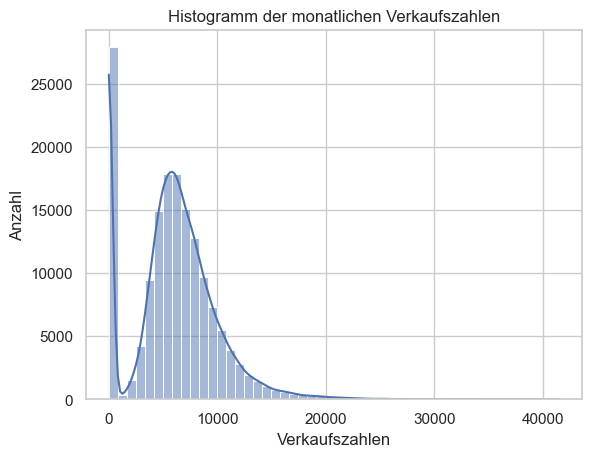

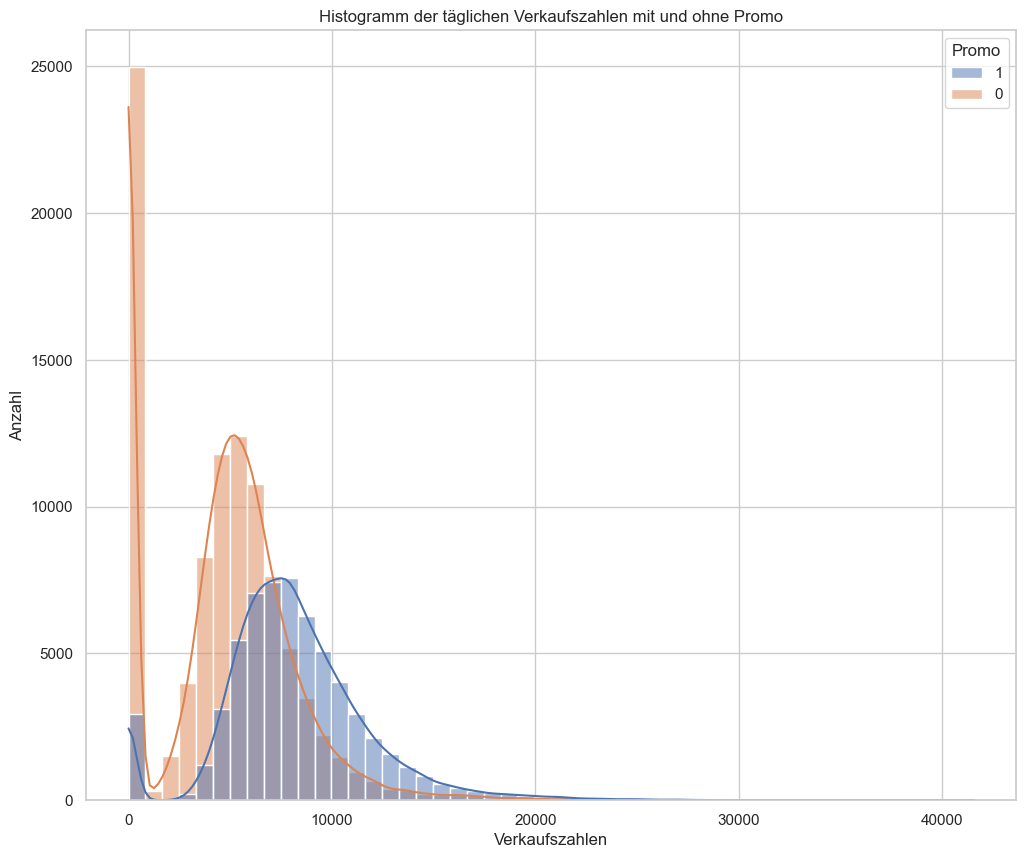

Der Store mit den besten Verkaufszahlen ist Store 262


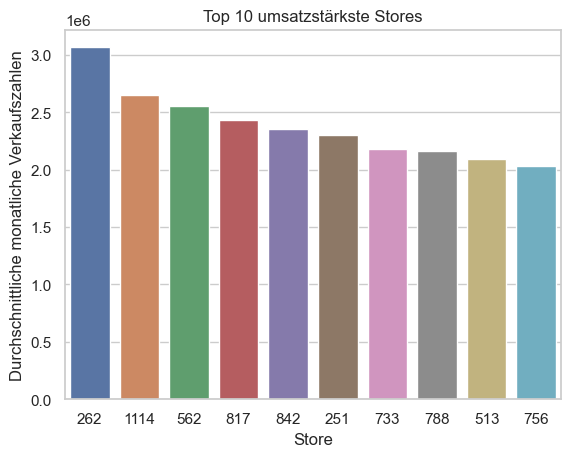

In [40]:
import seaborn as sns

sns.set_theme(style="whitegrid")

# 1. Histogramm der monatlichen Verkaufszahlen
sns.histplot(data=sales, x="Sales", kde=True, bins=50)
plt.title("Histogramm der monatlichen Verkaufszahlen")
plt.xlabel("Verkaufszahlen")
plt.ylabel("Anzahl")
plt.show()

# 2. Histogramm der täglichen Verkaufszahlen mit und ohne Promo
plt.figure(figsize=(12, 10))
plt.title("Histogramm der täglichen Verkaufszahlen mit und ohne Promo")
sns.histplot(data=sales, x="Sales", kde=True, hue="Promo", bins=50)
plt.xlabel("Verkaufszahlen")
plt.ylabel("Anzahl")
plt.show()

# 3. Store mit den besten Verkaufszahlen
plt.title("Verkaufszahlen jedes Stores")
best_store = sales.groupby("Store")["Sales"].sum().idxmax()
print(f"Der Store mit den besten Verkaufszahlen ist Store {best_store}")

# 4. Säulendiagramm der umsatzstärksten Stores
top_10_stores = sales.groupby("Store")["Sales"].sum().nlargest(10)
sns.barplot(x=top_10_stores.index, y=top_10_stores.values)
plt.title("Top 10 umsatzstärkste Stores")
plt.xlabel("Store")
plt.ylabel("Durchschnittliche monatliche Verkaufszahlen")
plt.show()